#  Anomaly/Novelty/Outlier Detection


<img src="https://drive.google.com/uc?id=1pe_mCfmLoXehK2lg6EGlsO0VVinwMvFK">


<img src="https://drive.google.com/uc?id=1TLXsvioIqTZpN8lHGma5aMz6v_RhCe1L">


##**Process Of Anomaly Detection**

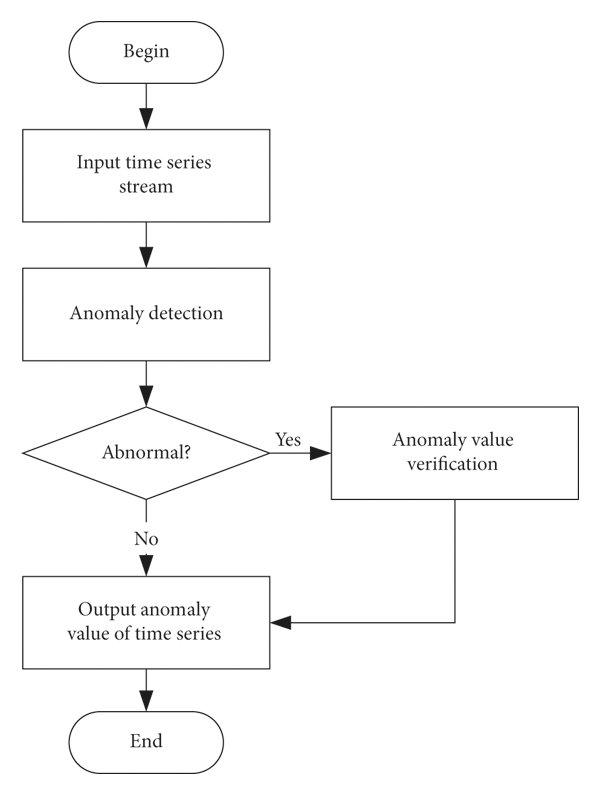

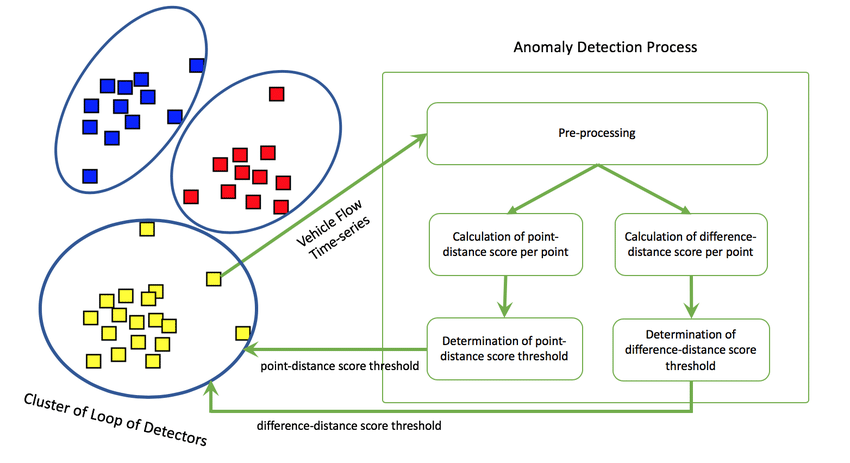

<img src="https://drive.google.com/uc?id=17yB9B28M1sQ1mQcvWi5ViZD3xn_DsWAL">

---
## **IQR**
---
>

- IQR = Q3 - Q1

- To detect the outliers using this method, we define a new range, let’s call it decision range

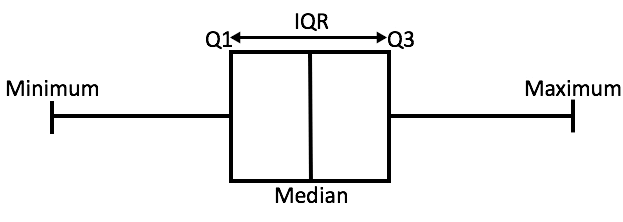

range is considered as outlier.

  - Lower Bound: (Q1 - 1.5 * IQR)
  - Upper Bound: (Q3 + 1.5 * IQR)

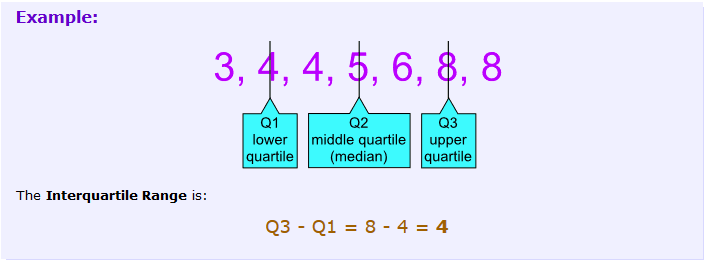

# IQR CODE:




In [ ]:
# Python program to find IQR of


# Function to give index of the median
def median(a, l, r):
	n = r - l + 1
	n = (n + 1) // 2 - 1
	return n + l

# Function to calculate IQR
def IQR(a, n):

	a.sort()

	# Index of median of entire data
	mid_index = median(a, 0, n - 1)

	# Median of first half
	Q1 = a[median(a, 0, mid_index)]

	# Median of second half
	if n % 2 == 0:
		Q3 = a[median(a, mid_index + 1, n - 1)]
	else:
		Q3 = a[median(a, mid_index + 1, n - 1)]

	# IQR calculation
	return (Q3 - Q1)

# SAMPLE CODE
if __name__=='__main__':
	a = [1, 21, 7, 6, 5, 9, 13, 27, 14, 2, 16]#Input
	n = len(a)
	print(IQR(a, n))



11



<img src="https://drive.google.com/uc?id=1j5F7Qi68FgVa67CqVDEE1XMg3PHGr-4J">



<img src="https://drive.google.com/uc?id=1g7p6XVwyRLjuvvAR0s2Sphs-mgKKto5H">

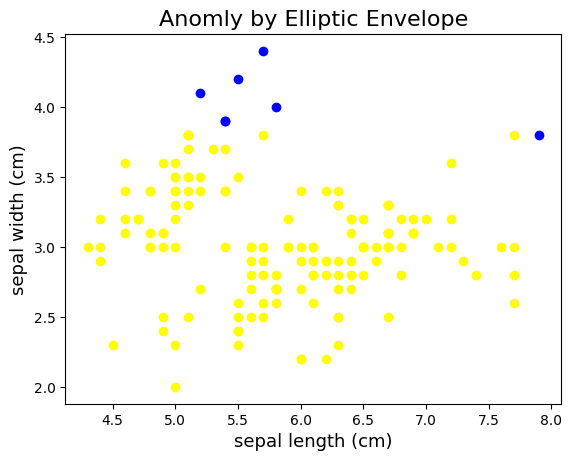

In [ ]:
# Import the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.covariance import EllipticEnvelope

df = load_iris(as_frame=True).frame
X = df[['sepal length (cm)','sepal width (cm)']]

# Define the model and set the contamination level
model = EllipticEnvelope(contamination=0.05)

# Fit the model to the data
model.fit(X)

# Calculate the outlier scores for each point
scores = model.decision_function(X)

# Identify the points with the highest outlier scores
outliers = np.argwhere(scores < np.percentile(scores, 5))

# Plot anomly
colors=['yellow','blue']

for i in range(len(X)):
	if i not in outliers:
		plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[0]) # Not anomly
	else:
		plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[1]) # anomly
plt.xlabel('sepal length (cm)',fontsize=13)
plt.ylabel('sepal width (cm)',fontsize=13)
plt.title('Anomly by Elliptic Envelope',fontsize=16)
plt.show()


#### **sklearn walkthrough**



<img src='https://drive.google.com/uc?id=167lbMc95Fvklb3zdv_em5-6x3C98eaYm'>


#### **Sklearn implementation**

In [ ]:
import numpy as np
from sklearn.covariance import EllipticEnvelope

In [ ]:
cov_mat = np.array([[0.8, 0.3],
                     [0.3, 0.4]])

In [ ]:
# Now we'll create a model EllipticEnvelope with some random state and then fit that model on our data X
X = np.random.RandomState(0).multivariate_normal(mean=[0,0], cov=cov_mat, size=500)

In [ ]:
# Now we'll create a model EllipticEnvelope with some random state and then fit that model on our data X
cov = EllipticEnvelope(random_state=0).fit(X)



In [ ]:
cov

EllipticEnvelope(random_state=0)

In [ ]:
# Passing datapoints to predict whether it is an outlier or an inlier. Return  −1  if outlier, or else it returns  1
cov.predict([[0,0],
             [3,3]])

array([ 1, -1])

#### **Disadvantages**

You might have find the concept of elliptical envelope quite straightforward, but there are limitations.

  - It cannot be used non-unimodal data
  - It is specifically for multivariate gaussians



## **Isolation Forest**

<img src="https://drive.google.com/uc?id=19uxkcRnjahrR3gqZ1KPzygDDT4OagYZt">

<img src="https://drive.google.com/uc?id=13jwOFdciMV74jpUnMjafUy5jgZDeRKgT">

Sub-sampling-

since iForest does not need to isolate all of normal instances, it can frequently ignore the big majority of the training sample. As a consequence, iForest works very well when the sampling size is kept small

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


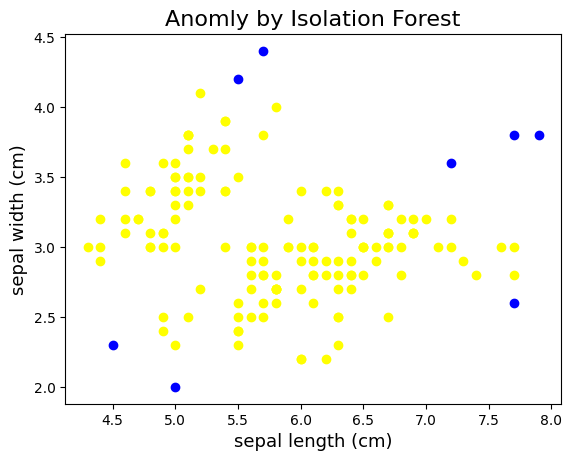

In [ ]:
#CODE
# Import the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest

df = load_iris(as_frame=True).frame
X = df[['sepal length (cm)','sepal width (cm)']]

# Define the model and set the contamination level
model = IsolationForest(contamination=0.05)

# Fit the model to the data
model.fit(X)

# Calculate the outlier scores for each point
scores = model.decision_function(X)

# Identify the points with the highest outlier scores
outliers = np.argwhere(scores < np.percentile(scores, 5))

# Plot anomly
colors=['yellow','blue']

for i in range(len(X)):
	if i not in outliers:
		plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[0]) # Not anomly
	else:
		plt.scatter(X.iloc[i,0], X.iloc[i,1], color=colors[1]) # anomly
plt.xlabel('sepal length (cm)',fontsize=13)
plt.ylabel('sepal width (cm)',fontsize=13)
plt.title('Anomly by Isolation Forest',fontsize=16)
plt.show()


**Limitations of Isolation Forest:**

1  The final anomaly score depends on the contamination parameter, provided while training the model. This implies that we should have an idea of what percentage of the data is anomalous beforehand to get a better prediction.

2 iForests makes splits and these splits are always parallel to either of the axis.


##**The Local Outlier Factor (LOF) algorithm**


<img src="https://drive.google.com/uc?id=1-MvPJUXNWLBQXFzgDek0uG_mFkYmNUEE">





##**How does Local Outlier Factor Method Work?**

<img src="https://drive.google.com/uc?id=1H8YCtX3oU-CPs4iNpA9t0IsuqmwKJKq_">




<img src="https://drive.google.com/uc?id=1bh4CNZxw4RHoUHMrTOLeBwcNr57GA7UB">
<img src="https://drive.google.com/uc?id=1je450B34liEoJ0f5vhMkheIuc9xABLRK">


In [ ]:
# Python Code for Local Outlier Factor Method

import numpy as np
from sklearn.neighbors import LocalOutlierFactor
X = [[-1.1], [0.12], [100.2], [0.4]]
lof = LocalOutlierFactor(n_neighbors=2)
print("outlier Labels: ", lof.fit_predict(X))
print("negative LOF factor: ", lof.negative_outlier_factor_)



outlier Labels:  [ 1  1 -1  1]
negative LOF factor:  [ -0.95333333  -1.10294118 -70.05598039  -0.95333333]


<img src="https://drive.google.com/uc?id=1QYZKeIaBX-ZeUGSysilnsm2NQvffK8Wi">


<img src="https://drive.google.com/uc?id=1kAusFMEiw2JsrfqxTtj2mTHihvHA1GcS">